In [1]:
import googlemaps
import time
import pprint
import json
import pandas as pd
import numpy as np

import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

import requests

import time

Two function to help with reading API data and converting to Pandas DataFrame

In [507]:

def Convert_to_Pandas(dataset):
    column_names = ['lat','lng', 'id', 'name','rating', 'plus_code','scope','types','user_ratings_total','vicinity'] 
    venue = pd.DataFrame(columns=column_names)
    num_entry=len(dataset['results'])
    for i in range(num_entry):
        #print(i)
        p_lat=dataset['results'][i]['geometry']['location']['lat']
        p_lng=dataset['results'][i]['geometry']['location']['lng']
        p_id=dataset['results'][i]['id']
        p_name=dataset['results'][i]['name']
        state ='rating' not in dataset['results'][i]
        if  state == True:
            p_rating=''
        else:
            p_rating=dataset['results'][i]['rating']
        state ='plus_code' not in dataset['results'][i]
        if  state == True:
            p_code=''
        else:
            p_code=dataset['results'][i]['plus_code']
        p_scope=dataset['results'][i]['scope']
        p_types=dataset['results'][i]['types']
        state ='user_ratings_total' not in dataset['results'][i]
        if  state == True:
            p_rat_tot=''
        else:
            p_rat_tot=dataset['results'][i]['user_ratings_total']
        p_adress=dataset['results'][i]['vicinity']


        venue = venue.append({'lat': p_lat,'lng': p_lng,
                                              'id': p_id,
                                              'name': p_name,
                                              'rating':p_rating,
                                              'plus_code':p_code,
                                              'scope':p_scope,
                                              'types':p_types,
                                              'user_ratings_total':p_rat_tot,
                                              'vicinity':p_adress }, ignore_index=True)

    return venue


In [57]:
def get_google_venues(loc,rad,op,type_request,j):
    print(type_request)
    appended_data=pd.DataFrame()
    data = gmaps.places_nearby(location=loc, radius=rad,open_now=op, type=type_request)
    
    venue=Convert_to_Pandas(data)
    state ='next_page_token' not in data 
    appended_data=appended_data.append(venue,ignore_index=True)
    
    if int(state)==1:
        return(appended_data)
    else:
        token=data['next_page_token']
        
    print('Read first pack of data')
    while int(state)==0 :
            time.sleep(2)
            data = gmaps.places_nearby(page_token=token)
            print('Read token from google API')
            venue=Convert_to_Pandas(data)
            appended_data=appended_data.append(venue,ignore_index=True)
            state ='next_page_token' not in data
            if int(state)==1:
                break
            else:
                token=data['next_page_token']
            
            
   

    #appended_venue = pd.concat(appended_venue)
    #venue_all=pd.concat([venue1,venue2,venue3])
    #venue_all.reset_index(inplace=True)
    #venue_all.drop(['index'], axis=1,inplace=True)
    #vv=vv.replace(r'', np.NaN)
    return(appended_data)
    

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

Metro data with the costs

In [5]:
pag=pd.read_html('https://www.irn.ru/rating/moscow/')
stations_costs_df=pag[0]
stations_costs_df=stations_costs_df.iloc[:,[3,4,5]]
stations_costs_df.columns = ['District','Metro','Cost']
stations_costs_df.dropna(subset=['Metro'], inplace=True)
stations_costs_df=stations_costs_df.set_index(['District','Cost']).apply(lambda x: x.str.split(',').explode()).reset_index() 
stations_costs_df

C:\Users\adokw8\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


District     Cost  \
0                                            Остоженка  403 710   
1                                            Остоженка  403 710   
2                                             Якиманка  384 385   
3                                             Якиманка  384 385   
4                                             Якиманка  384 385   
5                                                Арбат  370 425   
6                                                Арбат  370 425   
7                                                Арбат  370 425   
8                                                Арбат  370 425   
9                                                Арбат  370 425   
10                                        Центр Москвы  361 844   
11                                        Центр Москвы  361 844   
12                                        Центр Москвы  361 844   
13                                        Центр Москвы  361 844   
14                                        Центр Москвы  361 844   
15                                        Центр Москвы  361 844   
16                                            Тверской  345 097   
17                                            Тверской  345 097   
18                                            Тверской  345 097   
19                                            Тверской  345 097   
20                                           Хамовники  330 257   
21                                           Хамовники  330 257   
22                                           Хамовники  330 257   
23                                       Замоскворечье  312 005   
24                                       Замоскворечье  312 005   
25                                       Замоскворечье  312 005   
26                                       Замоскворечье  312 005   
27                                         Пресненский  309 195   
28                                         Пресненский  309 195   
29                                         Пресненский  309 195   
30                                         Пресненский  309 195   
31                                         Пресненский  309 195   
32                                         Пресненский  309 195   
33                                           Мещанский  276 583   
34                                           Мещанский  276 583   
35                                           Мещанский  276 583   
36                                           Мещанский  276 583   
37                                           Мещанский  276 583   
38                                             Донской  270 885   
39                                             Донской  270 885   
40                                             Донской  270 885   
41                                      Красносельский  267 042   
42                                      Красносельский  267 042   
43                                      Красносельский  267 042   
44                                      Красносельский  267 042   
45                                      Красносельский  267 042   
46                                        Дорогомилово  256 013   
47                                        Дорогомилово  256 013   
48                                        Дорогомилово  256 013   
49                                        Дорогомилово  256 013   
50                                           Таганский  254 289   
51                                           Таганский  254 289   
52                                           Таганский  254 289   
53                                           Таганский  254 289   
54                 Гагаринский, Ломоносовский, Раменки  244 627   
55                 Гагаринский, Ломоносовский, Раменки  244 627   
56                 Гагаринский, Ломоносовский, Раменки  244 627   
57                 Гагаринский, Ломоносовский, Раменки  244 627   
58                                             Беговой  242 010   
59                        

Metro Data with coordinates

In [6]:
url = "https://api.hh.ru/metro/1"

r = requests.get(url)

In [7]:
column_names = ['Metro', 'lat', 'lng'] 
Metros = pd.DataFrame(columns=column_names)


rr=r.json()['lines']
for i in range(len(rr)):
    data=rr[i]['stations']
    for j in range(len(data)):
       # data_name=rr[i]['stations'][j]['name']
        Metros = Metros.append({'Metro': rr[i]['stations'][j]['name'],
                                          'lat': rr[i]['stations'][j]['lat'],
                                          'lng': rr[i]['stations'][j]['lng'],
                                          }, ignore_index=True)
        #print(data2)
    
Metros = Metros.drop_duplicates(subset='Metro', keep='first')
Metros

Metro        lat        lng
0                  Новокосино  55.745113  37.864052
1                 Новогиреево  55.752237  37.814587
2                      Перово  55.750980  37.784220
3           Шоссе Энтузиастов  55.758090  37.751703
4                Авиамоторная  55.751933  37.717444
5              Площадь Ильича  55.747115  37.680726
6                Марксистская  55.740746  37.656040
7               Третьяковская  55.741125  37.626142
8                     Ховрино  55.877700  37.487700
9                 Беломорская  55.865100  37.476400
10              Речной вокзал  55.854152  37.476728
11             Водный стадион  55.838978  37.487515
12                 Войковская  55.818923  37.497791
13                      Сокол  55.805564  37.515245
14                   Аэропорт  55.800441  37.530477
15                     Динамо  55.789704  37.558212
16                Белорусская  55.777439  37.582107
17                 Маяковская  55.769808  37.596192
18                   Тверская  55.765343  37.603918
19                Театральная  55.758808  37.617680
20              Новокузнецкая  55.742391  37.629280
21                 Павелецкая  55.729741  37.638693
22              Автозаводская  55.706634  37.657008
23                  Технопарк  55.695000  37.664167
24                Коломенская  55.677423  37.663719
25                  Каширская  55.655745  37.649683
26             Кантемировская  55.636107  37.656218
27                   Царицыно  55.620982  37.669612
28                    Орехово  55.612690  37.695214
29              Домодедовская  55.610131  37.717111
30          Красногвардейская  55.614075  37.742697
31              Алма-Атинская  55.633490  37.765678
32                 Медведково  55.888103  37.661562
33               Бабушкинская  55.870641  37.664341
34                   Свиблово  55.855558  37.653379
35           Ботанический сад  55.844597  37.637811
36                       ВДНХ  55.819626  37.640751
37               Алексеевская  55.807794  37.638699
38                    Рижская  55.792494  37.636114
39              Проспект Мира  55.781827  37.633199
40                Сухаревская  55.772315  37.632850
41               Тургеневская  55.765371  37.636732
42                Китай-город  55.756498  37.631326
44                Октябрьская  55.731232  37.612851
45                Шаболовская  55.718828  37.607892
46         Ленинский проспект  55.706780  37.584990
47              Академическая  55.687147  37.572300
48                Профсоюзная  55.677671  37.562595
49            Новые Черемушки  55.670077  37.554493
50                  Калужская  55.656682  37.540075
51                    Беляево  55.642357  37.526115
52                   Коньково  55.631857  37.519156
53                Теплый Стан  55.618730  37.505912
54                    Ясенево  55.606182  37.533400
55             Новоясеневская  55.601947  37.553017
56      Бульвар Рокоссовского  55.814916  37.732227
57               Черкизовская  55.802787  37.744863
58     Преображенская площадь  55.796322  37.713582
59                 Сокольники  55.789282  37.679895
60             Красносельская  55.780014  37.666097
61              Комсомольская  55.774072  37.654565
62             Красные ворота  55.768307  37.647800
63               Чистые пруды  55.764990  37.638293
64                    Лубянка  55.759889  37.625336
65                Охотный ряд  55.757228  37.615078
66       Библиотека им.Ленина  55.752123  37.610388
67              Кропоткинская  55.745297  37.604217
68              Парк культуры  55.736163  37.595027
69                Фрунзенская  55.727462  37.580220
70                 Спортивная  55.722388  37.562041
71             Воробьевы горы  55.709169  37.557293
72                Университет  55.693290  37.534511
73       Проспект Вернадского  55.676549  37.504584
74               Юго-Западная  55.663146  37.482852
75                  Тропарево  55.645900  37.472500
76                  Румянцево  55.633000  37.441900
77                  

Some manipulations to merge Metro costs and coordinates

In [8]:
a=stations_costs_df.Metro.tolist()
c=stations_costs_df.Cost.tolist()
c=[w.replace('\xa0', '') for w in c]
column_names = ['Metro', 'Cost'] 
Metros_Cost = pd.DataFrame(columns=column_names)

for i in range(len(a)):
    test=a[i][0]==' '
    if test ==True:
        name=a[i][1:len(a[i])]
    else:
        name=a[i][0:len(a[i])]
    
    cost=c[i]
    #print(name)
    #print(cost)
    Metros_Cost = Metros_Cost.append({'Metro': name,'Cost': cost}, ignore_index=True)

Metros_Cost.Cost=Metros_Cost.Cost.astype('int64')
Metros_Cost['Metro']=Metros_Cost['Metro'].str.replace('имени ', 'им.')
Metros_Cost['Metro']=Metros_Cost['Metro'].str.replace('адмирала', 'Адмирала')
Metros_Cost['Metro']=Metros_Cost['Metro'].str.replace('академика', 'Академика')
Metros_Cost['Metro']=Metros_Cost['Metro'].str.replace('роща', 'Роща')
Metros_Cost['Metro']=Metros_Cost['Metro'].str.replace('Хорошёво', 'Хорошево')
Metros_Cost['Metro']=Metros_Cost['Metro'].str.replace('Улица Дмитриевского', 'Улица Дмитриевского ')
Metros_Cost['Metro']=Metros_Cost['Metro'].str.replace('Бутырская', 'Бутырская ')
Metros_Cost['Metro']=Metros_Cost['Metro'].str.replace('Говорово', 'Говорово ')
Metros_Cost['Metro']=Metros_Cost['Metro'].str.replace('Ольховая', 'Ольховая ')
Metros_Cost['Metro']=Metros_Cost['Metro'].str.replace('Прокшино', 'Прокшино ')
Metros_Cost['Metro']=Metros_Cost['Metro'].str.replace('Битцевский парк', 'Битцевский Парк')
Metros_Cost

Metro    Cost
0               Кропоткинская  403710
1               Парк культуры  403710
2               Новокузнецкая  384385
3                     Полянка  384385
4               Третьяковская  384385
5         Александровский сад  370425
6                   Арбатская  370425
7        Библиотека им.Ленина  370425
8                  Боровицкая  370425
9                  Смоленская  370425
10                Китай-город  361844
11             Кузнецкий мост  361844
12                    Лубянка  361844
13                Охотный ряд  361844
14          Площадь Революции  361844
15                Театральная  361844
16                 Маяковская  345097
17                 Пушкинская  345097
18                   Тверская  345097
19                  Чеховская  345097
20                    Лужники  330257
21                 Спортивная  330257
22                Фрунзенская  330257
23               Добрынинская  312005
24                Октябрьская  312005
25                 Павелецкая  312005
26               Серпуховская  312005
27                Баррикадная  309195
28                Выставочная  309195
29              Деловой центр  309195
30          Краснопресненская  309195
31              Международная  309195
32            Улица 1905 года  309195
33                Достоевская  276583
34              Проспект Мира  276583
35                Сухаревская  276583
36                    Трубная  276583
37            Цветной бульвар  276583
38         Ленинский проспект  270885
39           Площадь Гагарина  270885
40                Шаболовская  270885
41              Комсомольская  267042
42             Красные ворота  267042
43         Сретенский бульвар  267042
44               Тургеневская  267042
45               Чистые пруды  267042
46                   Киевская  256013
47                Кутузовская  256013
48                Парк Победы  256013
49               Студенческая  256013
50                    Курская  254289
51               Марксистская  254289
52                  Таганская  254289
53                 Чкаловская  254289
54             Воробьевы горы  244627
55     Ломоносовский проспект  244627
56                    Раменки  244627
57                Университет  244627
58                Белорусская  242010
59                 Бауманская  233088
60       Проспект Вернадского  221245
61                     Динамо  219429
62            Петровский парк  219429
63              Академическая  212421
64             Красносельская  210361
65                 Сокольники  210361
66            Новые Черемушки  209425
67                Профсоюзная  209425
68            Багратионовская  207763
69                    Минская  207763
70                 Пионерская  207763
71         Славянский бульвар  207763
72             Филевский парк  207763
73                       Фили  207763
74                   Шелепиха  207763
75                   Аэропорт  207106
76                      Сокол  207106
77               Марьина Роща  202237
78              Менделеевская  202237
79             Новослободская  202237
80                Савеловская  202237
81                 Крылатское  201794
82                      Зорге  198004
83           Октябрьское поле  198004
84               Панфиловская  198004
85     Волгоградский проспект  197805
86       Крестьянская застава  197805
87              Нижегородская  197805
88             Новохохловская  197805
89             Площадь Ильича  197805
90               Пролетарская  197805
91                    Римская  197805
92                    Беговая  196845
93               Полежаевская  196845
94                   Хорошево  196845
95                       ЦСКА  196845
96     Преображенская площадь  195636
97               Алексеевская  194327
98                    Рижская  194327
99                    Беляево  192211
100                 Калужская  192211
101                  Коньково  192211
102                 Тропарево  191070
103              Юго-Западная  191070
104      Мичуринский проспект  189

Final manipulations to merge Metro costs and coordinates

In [9]:
Fianl_M={}

Fianl_M = Metros.merge(Metros_Cost,on='Metro', how='outer')
Fianl_M.dropna(subset=['Cost'], inplace=True)
Fianl_M.dropna(subset=['lat'], inplace=True)
Fianl_M=Fianl_M.reset_index()
Fianl_M=Fianl_M.drop('index', axis=1)
Fianl_M



Metro        lat        lng      Cost
0                  Новокосино  55.745113  37.864052  143867.0
1                 Новогиреево  55.752237  37.814587  145654.0
2                      Перово  55.750980  37.784220  157766.0
3           Шоссе Энтузиастов  55.758090  37.751703  161844.0
4                Авиамоторная  55.751933  37.717444  161844.0
5              Площадь Ильича  55.747115  37.680726  197805.0
6                Марксистская  55.740746  37.656040  254289.0
7               Третьяковская  55.741125  37.626142  384385.0
8                     Ховрино  55.877700  37.487700  164663.0
9                 Беломорская  55.865100  37.476400  164663.0
10              Речной вокзал  55.854152  37.476728  164663.0
11             Водный стадион  55.838978  37.487515  157185.0
12                 Войковская  55.818923  37.497791  177325.0
13                      Сокол  55.805564  37.515245  207106.0
14                   Аэропорт  55.800441  37.530477  207106.0
15                     Динамо  55.789704  37.558212  219429.0
16                Белорусская  55.777439  37.582107  242010.0
17                 Маяковская  55.769808  37.596192  345097.0
18                   Тверская  55.765343  37.603918  345097.0
19                Театральная  55.758808  37.617680  361844.0
20              Новокузнецкая  55.742391  37.629280  384385.0
21                 Павелецкая  55.729741  37.638693  312005.0
22              Автозаводская  55.706634  37.657008  182760.0
23                  Технопарк  55.695000  37.664167  182760.0
24                Коломенская  55.677423  37.663719  179617.0
25                  Каширская  55.655745  37.649683  150598.0
26             Кантемировская  55.636107  37.656218  150598.0
27                   Царицыно  55.620982  37.669612  150598.0
28                    Орехово  55.612690  37.695214  150564.0
29              Домодедовская  55.610131  37.717111  150564.0
30          Красногвардейская  55.614075  37.742697  143818.0
31              Алма-Атинская  55.633490  37.765678  143818.0
32                 Медведково  55.888103  37.661562  154962.0
33               Бабушкинская  55.870641  37.664341  155137.0
34                   Свиблово  55.855558  37.653379  183159.0
35           Ботанический сад  55.844597  37.637811  183159.0
36                       ВДНХ  55.819626  37.640751  186883.0
37               Алексеевская  55.807794  37.638699  194327.0
38                    Рижская  55.792494  37.636114  194327.0
39              Проспект Мира  55.781827  37.633199  276583.0
40                Сухаревская  55.772315  37.632850  276583.0
41               Тургеневская  55.765371  37.636732  267042.0
42                Китай-город  55.756498  37.631326  361844.0
43                Октябрьская  55.731232  37.612851  312005.0
44                Шаболовская  55.718828  37.607892  270885.0
45         Ленинский проспект  55.706780  37.584990  270885.0
46              Академическая  55.687147  37.572300  212421.0
47                Профсоюзная  55.677671  37.562595  209425.0
48            Новые Черемушки  55.670077  37.554493  209425.0
49                  Калужская  55.656682  37.540075  192211.0
50                    Беляево  55.642357  37.526115  192211.0
51                   Коньково  55.631857  37.519156  192211.0
52                Теплый Стан  55.618730  37.505912  147796.0
53                    Ясенево  55.606182  37.533400  154404.0
54             Новоясеневская  55.601947  37.553017  154404.0
55      Бульвар Рокоссовского  55.814916  37.732227  160828.0
56               Черкизовская  55.802787  37.744863  160828.0
57     Преображенская площадь  55.796322  37.713582  195636.0
58                 Сокольники  55.789282  37.679895  210361.0
59             Красносельская  55.780014  37.666097  210361.0
60              Комсомольская  55.774072  37.654565  267042.0
61             Красные ворота  55.768307  37.647800  267042.0
62               Чистые пруды  55.764990  37.638293  267042.0
63                    Лубянка  55.759889  37.625336  361

Plot costs histogramm

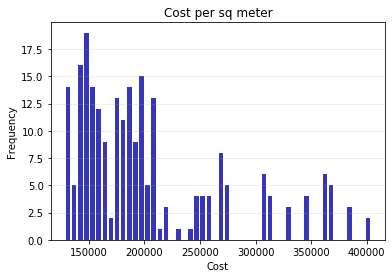

In [10]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=Fianl_M.Cost, bins=50, color='#0504aa',
                            alpha=0.8, rwidth=0.75)
plt.grid(axis='y', alpha=0.25)
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Cost per sq meter')

maxfreq = n.max()

Assign data class to metros based on histogramm

In [11]:

Metros_Cost_Type=[]
for i in Fianl_M.Cost:
    if i <173000:
        type1=0
    elif i >=173000 and i<222223:
        type1=1
    elif i >=222223 and i<288220:
        type1=2
    elif i >=288220:
        type1=3
        
    #print(type)
    Metros_Cost_Type.append(type1)
Metros_Cost_Type2=pd.DataFrame(Metros_Cost_Type)
    #Metros_Cost_Type = Metros_Cost_Type.append(type, ignore_index=True)
Fianl_Metro_types=pd.merge(Fianl_M, Metros_Cost_Type2, left_index=True, right_index=True)


#Fianl_Metro_types=Fianl_Metro_types.drop('index', axis=1)
Fianl_Metro_types.columns=['Metro','lat','lng','Cost','Type']
Fianl_Metro_types

Metro        lat        lng      Cost  Type
0                  Новокосино  55.745113  37.864052  143867.0     0
1                 Новогиреево  55.752237  37.814587  145654.0     0
2                      Перово  55.750980  37.784220  157766.0     0
3           Шоссе Энтузиастов  55.758090  37.751703  161844.0     0
4                Авиамоторная  55.751933  37.717444  161844.0     0
5              Площадь Ильича  55.747115  37.680726  197805.0     1
6                Марксистская  55.740746  37.656040  254289.0     2
7               Третьяковская  55.741125  37.626142  384385.0     3
8                     Ховрино  55.877700  37.487700  164663.0     0
9                 Беломорская  55.865100  37.476400  164663.0     0
10              Речной вокзал  55.854152  37.476728  164663.0     0
11             Водный стадион  55.838978  37.487515  157185.0     0
12                 Войковская  55.818923  37.497791  177325.0     1
13                      Сокол  55.805564  37.515245  207106.0     1
14                   Аэропорт  55.800441  37.530477  207106.0     1
15                     Динамо  55.789704  37.558212  219429.0     1
16                Белорусская  55.777439  37.582107  242010.0     2
17                 Маяковская  55.769808  37.596192  345097.0     3
18                   Тверская  55.765343  37.603918  345097.0     3
19                Театральная  55.758808  37.617680  361844.0     3
20              Новокузнецкая  55.742391  37.629280  384385.0     3
21                 Павелецкая  55.729741  37.638693  312005.0     3
22              Автозаводская  55.706634  37.657008  182760.0     1
23                  Технопарк  55.695000  37.664167  182760.0     1
24                Коломенская  55.677423  37.663719  179617.0     1
25                  Каширская  55.655745  37.649683  150598.0     0
26             Кантемировская  55.636107  37.656218  150598.0     0
27                   Царицыно  55.620982  37.669612  150598.0     0
28                    Орехово  55.612690  37.695214  150564.0     0
29              Домодедовская  55.610131  37.717111  150564.0     0
30          Красногвардейская  55.614075  37.742697  143818.0     0
31              Алма-Атинская  55.633490  37.765678  143818.0     0
32                 Медведково  55.888103  37.661562  154962.0     0
33               Бабушкинская  55.870641  37.664341  155137.0     0
34                   Свиблово  55.855558  37.653379  183159.0     1
35           Ботанический сад  55.844597  37.637811  183159.0     1
36                       ВДНХ  55.819626  37.640751  186883.0     1
37               Алексеевская  55.807794  37.638699  194327.0     1
38                    Рижская  55.792494  37.636114  194327.0     1
39              Проспект Мира  55.781827  37.633199  276583.0     2
40                Сухаревская  55.772315  37.632850  276583.0     2
41               Тургеневская  55.765371  37.636732  267042.0     2
42                Китай-город  55.756498  37.631326  361844.0     3
43                Октябрьская  55.731232  37.612851  312005.0     3
44                Шаболовская  55.718828  37.607892  270885.0     2
45         Ленинский проспект  55.706780  37.584990  270885.0     2
46              Академическая  55.687147  37.572300  212421.0     1
47                Профсоюзная  55.677671  37.562595  209425.0     1
48            Новые Черемушки  55.670077  37.554493  209425.0     1
49                  Калужская  55.656682  37.540075  192211.0     1
50                    Беляево  55.642357  37.526115  192211.0     1
51                   Коньково  55.631857  37.519156  192211.0     1
52                Теплый Стан  55.618730  37.505912  147796.0     0
53                    Ясенево  55.606182  37.533400  154404.0     0
54             Новоясеневская  55.601947  37.553017  154404.0     0
55      Бульвар Рокоссовского  55.814916  37.732227  160828.0     0
56               Черкизовская  55.802787  37.744863  160828.0     0
57     Преображенская площадь  55.796322  37.713582  195636.0     1
58          

Convert cyrrilic letters to latin

In [12]:
symbols = (u"абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ",
           u"abvgdeejzijklmnoprstufhzcss_y_euaABVGDEEJZIJKLMNOPRSTUFHZCSS_Y_EUA")
tr = {ord(a):ord(b) for a, b in zip(*symbols)}


text ='фы Добрый Ден'
q=text.translate(tr)

a=Fianl_M['Metro'].to_list()
Metros_translate=[]
for i in a:
    tran=i.translate(tr)
    Metros_translate.append(tran)

Metros_translate2=pd.DataFrame(Metros_translate)

Fianl_Metro_types=Fianl_Metro_types.drop('Metro', axis=1)
Fianl_Metro_types=Fianl_Metro_types.merge( Metros_translate2, left_index=True, right_index=True)
Fianl_Metro_types.columns=['lat','lng','Cost','Type','Metro']
Fianl_Metro_types

lat        lng      Cost  Type                     Metro
0    55.745113  37.864052  143867.0     0                Novokosino
1    55.752237  37.814587  145654.0     0               Novogireevo
2    55.750980  37.784220  157766.0     0                    Perovo
3    55.758090  37.751703  161844.0     0         Sosse Entuziastov
4    55.751933  37.717444  161844.0     0              Aviamotornaa
5    55.747115  37.680726  197805.0     1            Plosad_ Il_ica
6    55.740746  37.656040  254289.0     2              Marksistskaa
7    55.741125  37.626142  384385.0     3             Tret_akovskaa
8    55.877700  37.487700  164663.0     0                   Hovrino
9    55.865100  37.476400  164663.0     0               Belomorskaa
10   55.854152  37.476728  164663.0     0             Recnoj vokzal
11   55.838978  37.487515  157185.0     0            Vodnyj stadion
12   55.818923  37.497791  177325.0     1                Vojkovskaa
13   55.805564  37.515245  207106.0     1                     Sokol
14   55.800441  37.530477  207106.0     1                  Aeroport
15   55.789704  37.558212  219429.0     1                    Dinamo
16   55.777439  37.582107  242010.0     2               Belorusskaa
17   55.769808  37.596192  345097.0     3                Maakovskaa
18   55.765343  37.603918  345097.0     3                  Tverskaa
19   55.758808  37.617680  361844.0     3               Teatral_naa
20   55.742391  37.629280  384385.0     3             Novokuznezkaa
21   55.729741  37.638693  312005.0     3                Pavelezkaa
22   55.706634  37.657008  182760.0     1             Avtozavodskaa
23   55.695000  37.664167  182760.0     1                 Tehnopark
24   55.677423  37.663719  179617.0     1               Kolomenskaa
25   55.655745  37.649683  150598.0     0                 Kasirskaa
26   55.636107  37.656218  150598.0     0            Kantemirovskaa
27   55.620982  37.669612  150598.0     0                  Zarizyno
28   55.612690  37.695214  150564.0     0                   Orehovo
29   55.610131  37.717111  150564.0     0             Domodedovskaa
30   55.614075  37.742697  143818.0     0         Krasnogvardejskaa
31   55.633490  37.765678  143818.0     0             Alma-Atinskaa
32   55.888103  37.661562  154962.0     0                Medvedkovo
33   55.870641  37.664341  155137.0     0              Babuskinskaa
34   55.855558  37.653379  183159.0     1                  Sviblovo
35   55.844597  37.637811  183159.0     1          Botaniceskij sad
36   55.819626  37.640751  186883.0     1                      VDNH
37   55.807794  37.638699  194327.0     1              Alekseevskaa
38   55.792494  37.636114  194327.0     1                   Rijskaa
39   55.781827  37.633199  276583.0     2             Prospekt Mira
40   55.772315  37.632850  276583.0     2               Suharevskaa
41   55.765371  37.636732  267042.0     2              Turgenevskaa
42   55.756498  37.631326  361844.0     3               Kitaj-gorod
43   55.731232  37.612851  312005.0     3               Oktabr_skaa
44   55.718828  37.607892  270885.0     2               Sabolovskaa
45   55.706780  37.584990  270885.0     2        Leninskij prospekt
46   55.687147  37.572300  212421.0     1             Akademiceskaa
47   55.677671  37.562595  209425.0     1               Profsouznaa
48   55.670077  37.554493  209425.0     1           Novye Ceremuski
49   55.656682  37.540075  192211.0     1                 Kalujskaa
50   55.642357  37.526115  192211.0     1                   Belaevo
51   55.631857  37.519156  192211.0     1                  Kon_kovo
52   55.618730  37.505912  147796.0     0               Teplyj Stan
53   55.606182  37.533400  154404.0     0                   Asenevo
54   55.601947  37.553017  154404.0     0            Novoasenevskaa
55   55.814916  37.732227  160828.0     0     Bul_var Rokossovskogo
56   55.802787  37.744863  160828.0     0              Cerkizovskaa
57   55.796322  37.713582  195636.0     1    Preobrajenskaa plosad_

Plot map with cost classes

In [13]:
latitude=Fianl_Metro_types['lat'][41]
longitude=Fianl_Metro_types['lng'][41]
num_types=4
map_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(num_types)
ys = [i + x + (i*x)**2 for i in range(num_types)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Fianl_Metro_types['lat'], Fianl_Metro_types['lng'], Fianl_Metro_types['Metro'], Fianl_Metro_types['Type']):
    label = folium.Popup(str(poi) + ' Type ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_moscow)
       

map_moscow



In [ ]:
Assign Google API key and objects for further usage.  
API Key removed for confidentialy reasons

In [1384]:
API_KEY=' '



gmaps=googlemaps.Client(key = API_KEY)
loc='55.6553121, 37.4918083'
rad=2000
op=False
type_request='cafe'

Read data from mysleft prepared file with the venue types for google request

In [146]:
types_frame = pd.read_excel('c:\\1\\GitHub\\types.xlsx')
types_list=types_frame.values.tolist()
types_list

[['aquarium', 'n', 'aquarium'],
 ['art_gallery', 'n', 'art_gallery'],
 ['bakery', 'p', 'café'],
 ['bank', 'p', 'bank'],
 ['bar', 'p', 'café'],
 ['bus_station', 'n', 'bus_station'],
 ['cafe', 'p', 'café'],
 ['car_repair', 'p', 'car'],
 ['clothing_store', 'p', 'store'],
 ['doctor', 'p', 'medical'],
 ['electronics_store', 'p', 'store'],
 ['gym', 'p', 'spa'],
 ['home_goods_store', 'p', 'store'],
 ['hospital', 'p', 'medical'],
 ['laundry', 'p', 'spa'],
 ['library', 'n', 'library'],
 ['movie_theater', 'n', 'movie_theater'],
 ['museum', 'n', 'museum'],
 ['park', 'n', 'park'],
 ['pharmacy', 'p', 'medical'],
 ['primary_school', 'p', 'school'],
 ['restaurant', 'p', 'café'],
 ['school', 'p', 'school'],
 ['secondary_school', 'p', 'school'],
 ['spa', 'p', 'spa'],
 ['stadium', 'n', 'stadium'],
 ['store', 'p', 'store'],
 ['supermarket', 'p', 'store'],
 ['tourist_attraction', 'n', 'tourist_attraction'],
 ['university', 'n', 'university'],
 ['zoo', 'n', 'zoo']]

Read Data for selected loacation and output single Frame

In [453]:
def read_google_list(loc,rad,types_list):
    t_start=time.time()
    Result = [ ]
    Result=pd.DataFrame()
    for type_l in types_list:
        print(type_l[2])
        print(type_l[0])
        test33=get_google_venues(loc,rad,op,type_l[0],2)
        col=['lat','lng','name','rating','user_ratings_total','type','accum_type']
        test2=pd.DataFrame(columns=col)
        test2['lat']=test33['lat']
        test2['lng']=test33['lng']
        test2['name']=test33['name']
        test2['rating']=test33['rating']
        test2['user_ratings_total']=test33['user_ratings_total']
        test2['type']=type_l[2]
        test2['accum_type']=type_l[1]
        Result=Result.append(test2,ignore_index=True)

    t_end = time.time()
    total_time=t_start-t_end
    print('Total times was - ',"%.f" % total_time,' seconds')
    return(Result2)


Function to Produce line for Modelling for each metro

In [450]:
def line_for_modelling(Result2):
    Result2 = Result2.drop_duplicates(subset='name', keep='first')
    Result2['rating']=pd.to_numeric(Result2['rating'])
    Result2['user_ratings_total']=pd.to_numeric(Result2['user_ratings_total'])
    Result2['tot_rating']=Result2['rating']*Result2['user_ratings_total']
    Num_Types=Result2[['type','tot_rating']].fillna(0).groupby(['type']).count()
    R_sum=Result2[['rating','user_ratings_total','type','tot_rating']].fillna(0).groupby(['type']).sum()
    R_sum['avrg']=R_sum['tot_rating']/R_sum['user_ratings_total']
    Num_Types_Rat_Av=R_sum[['user_ratings_total','avrg']]
    Num_Types_Rat_Av_Num=pd.concat([Num_Types_Rat_Av,Num_Types],axis=1, join='inner')
    Num_Types_Rat_Av_Num
    All_Columns=list(['amusement_park', 'aquarium', 'art_gallery', 'café', 'bank',
                 'bus_station', 'car', 'store', 'medical', 'spa', 'library', 'movie_theater', 'museum', 'park', 'school',
                 'stadium' ,'tourist_attraction', 'university', 'zoo'])
    All_Columns_usr=[]
    for i in All_Columns:
        a=i+'_usr'
        All_Columns_usr.append(a)

    All_Columns_avr=[]
    for i in All_Columns:
        a=i+'_avr'
        All_Columns_avr.append(a)

    All_Columns_tot=[]
    for i in All_Columns:
        a=i+'_tot'
        All_Columns_tot.append(a)


    cols=list(All_Columns_usr+All_Columns_avr+All_Columns_tot)

    All=pd.DataFrame(columns=[cols],index=range(1))
    for i in All_Columns:
        a=i in Num_Types_Rat_Av_Num.T.columns
        if a==True:
            coll=i+'_usr'
            All.loc[:,i+'_usr'] = Num_Types_Rat_Av_Num.T[i][0]
            All.loc[:,i+'_avr'] = Num_Types_Rat_Av_Num.T[i][1]
            All.loc[:,i+'_tot'] = Num_Types_Rat_Av_Num.T[i][2]
    return(All)       

# Read all data here

In [1385]:
Result1=pd.DataFrame()
#Fianl_Metro_types2=Fianl_Metro_types.loc[0:1]

for lat, lon, metro, typ in zip(Fianl_Metro_types['lat'], Fianl_Metro_types['lng'], Fianl_Metro_types['Metro'], Fianl_Metro_types['Type']):
#for lat, lon, metro, typ in zip(Fianl_Metro_types2['lat'], Fianl_Metro_types2['lng'], Fianl_Metro_types2['Metro'], Fianl_Metro_types2['Type']):
    locs=[lat,lon]
    rad=2000
    op=False
    print(metro)
    #tmp=read_google_list(locs,rad,types_list)
    t_start=time.time()
    tmp = [ ]
    tmp=pd.DataFrame()
    for type_l in types_list:
        print(type_l[2])
        print(type_l[0])
        test33=get_google_venues(locs,rad,op,type_l[0],2)
        col=['lat','lng','name','rating','user_ratings_total','type','accum_type']
        test2=pd.DataFrame(columns=col)
        test2['lat']=test33['lat']
        test2['lng']=test33['lng']
        test2['name']=test33['name']
        test2['rating']=test33['rating']
        test2['user_ratings_total']=test33['user_ratings_total']
        test2['type']=type_l[2]
        test2['accum_type']=type_l[1]
        tmp=tmp.append(test2,ignore_index=True)

    t_end = time.time()
    total_time=t_start-t_end
    print('Total times was - ',"%.f" % total_time,' seconds')
    asd=line_for_modelling(tmp)
    
    Result1=Result1.append(asd,ignore_index=True)
    

Novokosino
aquarium
aquarium
aquarium
art_gallery
art_gallery
art_gallery
café
bakery
bakery
bank
bank
bank
Read first pack of data


Timeout: 

Look at the results

In [1390]:
Result1

Unnamed: 0  amusement_park_usr  aquarium_usr  art_gallery_usr  café_usr  \
0             0                 NaN           NaN              2.0   14109.0   
1             1                 NaN           NaN              1.0   23657.0   
2             2                 NaN           NaN              0.0   15822.0   
3             3                 NaN           NaN              0.0    7532.0   
4             4                 NaN           3.0              0.0   14544.0   
5             5                 NaN           1.0            294.0   39011.0   
6             6                 NaN           2.0            771.0   71273.0   
7             7                 NaN           2.0           4712.0  132272.0   
8             8                 NaN          20.0              0.0    8094.0   
9             9                 NaN          20.0              0.0   20143.0   
10           10                 NaN          20.0              0.0   18401.0   
11           11                 NaN           NaN              0.0   18280.0   
12           12                 NaN           NaN              5.0   26610.0   
13           13                 NaN          33.0             76.0   27058.0   
14           14                 NaN          33.0             73.0   26200.0   
15           15                 NaN          33.0             22.0   22078.0   
16           16                 NaN           0.0           1149.0   73894.0   
17           17                 NaN           0.0            965.0   82744.0   
18           18                 NaN           2.0            959.0  148599.0   
19           19                 NaN         771.0           1644.0  150509.0   
20           20                 NaN           2.0           4784.0  129261.0   
21           21                 NaN           2.0           1849.0   72652.0   
22           22                 NaN           NaN             69.0   26861.0   
23           23                 NaN           NaN              1.0   22034.0   
24           24                 NaN           NaN              NaN   21861.0   
25           25                 NaN          17.0              8.0   18272.0   
26           26                 NaN           NaN             13.0   13157.0   
27           27                 NaN           NaN              NaN   12064.0   
28           28                 NaN           NaN              2.0   19034.0   
29           29                 NaN           NaN              2.0   17771.0   
30           30                 NaN           NaN              2.0   17707.0   
31           31                 NaN           NaN              NaN    7468.0   
32           32                 NaN           NaN              5.0   20783.0   
33           33                 NaN           NaN              4.0   20260.0   
34           34                 NaN           NaN              4.0   16803.0   
35           35                 NaN       32424.0         102883.0   20135.0   
36           36                 NaN           NaN         102883.0   43516.0   
37           37                 NaN           NaN             12.0   30936.0   
38           38                 NaN           NaN            115.0   32423.0   
39           39                 NaN           NaN            633.0   64277.0   
40           40                 NaN         771.0            927.0   85728.0   
41           41                 NaN         771.0            790.0  137410.0   
42           42                 NaN         771.0           2889.0  138322.0   
43           43                 NaN           NaN           4676.0   75587.0   
44           44                 NaN           NaN            505.0   38515.0   
45           45                 NaN           NaN            242.0   20762.0   
46           46                 NaN          50.0              2.0   27275.0   
47           47                 NaN           NaN             10.0   25904.0   
48           48                 NaN           NaN             24.0   23374.0   
49   

Explore data statistics

In [1252]:
#Result1.describe()
Result1.dtypes
Result1.fillna(0).astype('int32').describe()

amusement_park_usr  aquarium_usr art_gallery_usr       café_usr  \
count              235.0    235.000000      235.000000     235.000000   
mean                 0.0    217.361702     1303.195745   35130.821277   
std                  0.0   2128.711916     9487.355708   38412.894845   
min                  0.0      0.000000        0.000000       0.000000   
25%                  0.0      0.000000        2.000000   11956.500000   
50%                  0.0      0.000000       26.000000   20252.000000   
75%                  0.0      2.000000      226.000000   34904.000000   
max                  0.0  32424.000000   102883.000000  152331.000000   

         bank_usr bus_station_usr      car_usr     store_usr  medical_usr  \
count  235.000000      235.000000   235.000000    235.000000   235.000000   
mean   207.634043       45.106383   897.195745  15361.693617   929.340426   
std    130.612504       48.178991   911.053666  10878.337183   440.641581   
min      0.000000        0.000000     0.000000      6.000000     0.000000   
25%    100.000000       15.000000   331.500000   8988.500000   633.000000   
50%    197.000000       26.000000   610.000000  12380.000000   921.000000   
75%    294.000000       58.000000  1095.000000  17212.000000  1183.500000   
max    622.000000      271.000000  5493.000000  55637.000000  2155.000000   

            spa_usr  library_usr movie_theater_usr    museum_usr  \
count    235.000000   235.000000        235.000000    235.000000   
mean    5003.855319   104.868085       4265.544681   5652.600000   
std     9186.853634   208.123822       4387.798972   8942.522977   
min        4.000000     0.000000          0.000000      0.000000   
25%     1301.000000    14.000000       1094.500000     19.500000   
50%     1703.000000    26.000000       2684.000000    758.000000   
75%     2933.500000    55.000000       6125.000000   9333.500000   
max    34917.000000  1591.000000      17052.000000  49718.000000   

            park_usr   school_usr   stadium_usr tourist_attraction_usr  \
count     235.000000   235.000000    235.000000             235.000000   
mean    18263.651064   350.348936    869.191489           22280.229787   
std     29473.122651   278.778727   2439.452822           51994.665239   
min         0.000000     0.000000      0.000000               0.000000   
25%      1965.500000   242.500000      0.000000              46.000000   
50%      7333.000000   308.000000     25.000000             809.000000   
75%     16823.000000   391.000000    347.000000           13781.000000   
max    138342.000000  2277.000000  14480.000000          194306.000000   

      university_usr      zoo_usr amusement_park_avr aquarium_avr  \
count     235.000000   235.000000              235.0   235.000000   
mean      330.378723   342.429787                0.0     0.961702   
std       379.852802  1542.126606                0.0     1.620720   
min         0.000000     0.000000                0.0     0.000000   
25%        58.000000     0.000000                0.0     0.000000   
50%       181.000000     0.000000                0.0     0.000000   
75%       480.000000     0.000000                0.0     2.000000   
max      1748.000000  7642.000000                0.0     4.000000   

      art_gallery_avr    café_avr    bank_avr bus_station_avr     car_avr  \
count      235.000000  235.000000  235.000000      235.000000  235.000000   
mean         3.306383    3.965957    2.774468        3.731915    3.914894   
std          1.679362    0.368223    0.527236        0.679714    0.425159   
min          0.000000    0.000000    0.000000        0.000000    0.000000   
25%          4.000000    4.000000    3.000000        3.500000    4.000000   
50%          4.000000    4.000000    3.000000        4.000000    4.000000   
75%          4.000000    4.000000    3.000000        4.000000    4.000000   
max          5.000000    4.000000    4.000000        5.000000    4.000000   

        store_avr medical_avr     spa_avr library_avr movi

Save results tp CSV

In [522]:
#Result1.to_csv('c:\\1\\Results.csv')
Result1

amusement_park_usr aquarium_usr art_gallery_usr café_usr bank_usr  \
0                  NaN          NaN               2    14109      155   
1                  NaN          NaN               1    23657      186   
2                  NaN          NaN               0    15822      208   
3                  NaN          NaN               0     7532      102   
4                  NaN            3               0    14544      145   
5                  NaN            1             294    39011      282   
6                  NaN            2             771    71273      357   
7                  NaN            2            4712   132272      356   
8                  NaN           20               0     8094       26   
9                  NaN           20               0    20143      171   
10                 NaN           20               0    18401      296   
11                 NaN          NaN               0    18280      204   
12                 NaN          NaN               5    26610      398   
13                 NaN           33              76    27058      339   
14                 NaN           33              73    26200      327   
15                 NaN           33              22    22078      449   
16                 NaN            0            1149    73894      282   
17                 NaN            0             965    82744      339   
18                 NaN            2             959   148599      295   
19                 NaN          771            1644   150509      341   
20                 NaN            2            4784   129261      352   
21                 NaN            2            1849    72652      289   
22                 NaN          NaN              69    26861      230   
23                 NaN          NaN               1    22034      198   
24                 NaN          NaN             NaN    21861       68   
25                 NaN           17               8    18272      146   
26                 NaN          NaN              13    13157       89   
27                 NaN          NaN             NaN    12064       62   
28                 NaN          NaN               2    19034      115   
29                 NaN          NaN               2    17771      156   
30                 NaN          NaN               2    17707      144   
31                 NaN          NaN             NaN     7468       94   
32                 NaN          NaN               5    20783      146   
33                 NaN          NaN               4    20260      239   
34                 NaN          NaN               4    16803      149   
35                 NaN        32424          102883    20135       55   
36                 NaN          NaN          102883    43516      314   
37                 NaN          NaN              12    30936      370   
38                 NaN          NaN             115    32423      296   
39                 NaN          NaN             633    64277      282   
40                 NaN          771             927    85728      465   
41                 NaN          771             790   137410      521   
42                 NaN          771            2889   138322      478   
43                 NaN          NaN            4676    75587      243   
44                 NaN          NaN             505    38515      283   
45                 NaN          NaN             242    20762      622   
46                 NaN           50               2    27275      253   
47                 NaN          NaN              10    25904      321   
48                 NaN          NaN              24    23374      336   
49                 NaN          NaN             293    17900      236   
50                 NaN          NaN             287    23031      198   
51                 NaN          NaN             287    17499      165   
52                 NaN          NaN               5    10816       71   
53                 NaN          NaN               1     7854  

Chaeck random attribute nd how it looks on the map

In [601]:
import branca
import branca.colormap as cm
colormap = cm.LinearColormap(colors=['blue','yellow','red'], index=[4.5,4.6,4.9],vmin=4.5,vmax=4.9)
Result2=Result1.iloc(1)[32].fillna(3)

latitude=Fianl_Metro_types['lat'][41]
longitude=Fianl_Metro_types['lng'][41]
num_types=4
map_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)

#x = np.arange(num_types)
#ys = [i + x + (i*x)**2 for i in range(num_types)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Fianl_Metro_types_Att['lat'], Fianl_Metro_types_Att['lng'], Fianl_Metro_types_Att['Metro'], Result2):
    label = folium.Popup(str(poi) + ' Type ' + str(cluster), parse_html=True)
    #print(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colormap(cluster),
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colormap(cluster),
        fill_opacity=0.7).add_to(map_moscow)
    
map_moscow.add_child(colormap)
map_moscow

First step of data preprocessing including taking care of NaN

In [1337]:
a=Result1.columns
c=[]
for i in a:
    c.append(i[0])
Result2=pd.DataFrame(Result1.values,columns=c)
Result2=Result2.drop('amusement_park_usr', axis=1)
Result2=Result2.drop('amusement_park_avr', axis=1)
Result2=Result2.drop('amusement_park_tot', axis=1)

from sklearn.preprocessing import Normalizer
#transformer = Normalizer().fit(Result2)  # fit does nothing.
#Result3=transformer.transform(Result2)

Result2.iloc[:,36:54]=Result2.iloc[:,36:54].fillna(0)

Result2.iloc[:,0:18]=Result2.fillna(0)

Result2.iloc[:,18:36]=Result2.fillna(Result2.mean())

#Result2=Result2.fillna(Result2.mean())
#Result2.iloc[:,:] = Normalizer(norm='max').fit_transform(Result2)

a=Result2.columns
c=[]
for i in a:
    c.append(i[0])
    
#Result3=pd.DataFrame(Result3,columns=c)
Result2.head(20)

aquarium_usr art_gallery_usr café_usr bank_usr bus_station_usr car_usr  \
0             0               2    14109      155              17     988   
1             0               1    23657      186              52     617   
2             0               0    15822      208              46    1002   
3             0               0     7532      102              13     623   
4             3               0    14544      145              26     469   
5             1             294    39011      282              39     836   
6             2             771    71273      357              58    1121   
7             2            4712   132272      356             112     255   
8            20               0     8094       26              63    1358   
9            20               0    20143      171              81     836   
10           20               0    18401      296              67     907   
11            0               0    18280      204              49     998   
12            0               5    26610      398              10     339   
13           33              76    27058      339              23     631   
14           33              73    26200      327              20     243   
15           33              22    22078      449              14     455   
16            0            1149    73894      282              50     135   
17            0             965    82744      339              95      66   
18            2             959   148599      295             116      47   
19          771            1644   150509      341             134      59   

   store_usr medical_usr spa_usr library_usr movie_theater_usr museum_usr  \
0      13828         468    1703          12              3408         50   
1      11221         936    1417          19              1811       1241   
2       4323         812    7552          28              1811        547   
3       4306         447    1375          11                 0        122   
4      13012         336    1918          17              3838        690   
5      11313        1273    3255          53              6763       6292   
6      13110        1361    3137         249             16099      13317   
7      15956         993    2465         301             12836      25638   
8       9475         548    1403          20                 0         15   
9      14039         795    1747          12                 1       2358   
10     19047         678    2954          22              8997       2388   
11     14657         311    4365           7              8524         27   
12     13214         584    3934          15              4584       5960   
13      8561        1178    1621          29               663       6330   
14     18104        1848    2030          26              4553       6707   
15     21342        1571    2859          20              4613        480   
16     12380        1508    3369          55              4345      14328   
17     41772        1547   10199         212             12556      19339   
18     46397        1184   34809         668             15191      13383   
19     47802         966   34363         726             16841      13235   

   park_usr school_usr stadium_usr tourist_attraction_usr university_usr  \
0      4355        325         745                     46             80   
1      8501        362           0                  10052             63   
2      5028        330         225                     11             39   
3     11789        145           0                     27             40   
4       740        159         744                    174            416   
5     13696       2104         179                   5033            415   
6      9934       2277           4                  14098            459   
7    107776        451           0                 190257            262   
8      5321        246           0                     46             56   
9     2

More processing including data normalization 

In [1338]:
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

Result2a=Result2

transformer = Normalizer().fit(Result2)  # fit does nothing.
a=Result2.columns
c=[]
for i in a:
    c.append(i)


min_max_scaler = preprocessing.MinMaxScaler()
Result22 = min_max_scaler.fit_transform(Result2)
Result2 = pd.DataFrame(Result22,columns=c)

Result3=pd.concat([Result2,Fianl_Metro_types[['lat','lng','Type','Metro']]],  axis=1)

Result3.head(20)
Result4=Result3.iloc[:,0:54].loc[Result3['Type'] == typee]
Result3

aquarium_usr  art_gallery_usr  café_usr  bank_usr  bus_station_usr  \
0        0.000000         0.000019  0.092621  0.249196         0.062731   
1        0.000000         0.000010  0.155300  0.299035         0.191882   
2        0.000000         0.000000  0.103866  0.334405         0.169742   
3        0.000000         0.000000  0.049445  0.163987         0.047970   
4        0.000093         0.000000  0.095476  0.233119         0.095941   
5        0.000031         0.002858  0.256094  0.453376         0.143911   
6        0.000062         0.007494  0.467882  0.573955         0.214022   
7        0.000062         0.045800  0.868320  0.572347         0.413284   
8        0.000617         0.000000  0.053134  0.041801         0.232472   
9        0.000617         0.000000  0.132232  0.274920         0.298893   
10       0.000617         0.000000  0.120796  0.475884         0.247232   
11       0.000000         0.000000  0.120002  0.327974         0.180812   
12       0.000000         0.000049  0.174685  0.639871         0.036900   
13       0.001018         0.000739  0.177626  0.545016         0.084871   
14       0.001018         0.000710  0.171994  0.525723         0.073801   
15       0.001018         0.000214  0.144934  0.721865         0.051661   
16       0.000000         0.011168  0.485088  0.453376         0.184502   
17       0.000000         0.009380  0.543186  0.545016         0.350554   
18       0.000062         0.009321  0.975501  0.474277         0.428044   
19       0.023779         0.015979  0.988039  0.548232         0.494465   
20       0.000062         0.046499  0.848553  0.565916         0.479705   
21       0.000062         0.017972  0.476935  0.464630         0.202952   
22       0.000000         0.000671  0.176333  0.369775         0.070111   
23       0.000000         0.000010  0.144646  0.318328         0.136531   
24       0.000000         0.000000  0.143510  0.109325         0.129151   
25       0.000524         0.000078  0.119949  0.234727         0.084871   
26       0.000000         0.000126  0.086371  0.143087         0.055351   
27       0.000000         0.000000  0.079196  0.099678         0.099631   
28       0.000000         0.000019  0.124952  0.184887         0.125461   
29       0.000000         0.000019  0.116660  0.250804         0.926199   
30       0.000000         0.000019  0.116240  0.231511         0.944649   
31       0.000000         0.000000  0.049025  0.151125         0.084871   
32       0.000000         0.000049  0.136433  0.234727         0.070111   
33       0.000000         0.000039  0.133000  0.384244         0.107011   
34       0.000000         0.000039  0.110306  0.239550         0.051661   
35       1.000000         1.000000  0.132179  0.088424         0.055351   
36       0.000000         1.000000  0.285667  0.504823         0.066421   
37       0.000000         0.000117  0.203084  0.594855         0.073801   
38       0.000000         0.001118  0.212846  0.475884         0.243542   
39       0.000000         0.006153  0.421956  0.453376         0.354244   
40       0.023779         0.009010  0.562774  0.747588         0.335793   
41       0.023779         0.007679  0.902049  0.837621         0.365314   
42       0.023779         0.028080  0.908036  0.768489         0.394834   
43       0.000000         0.045450  0.496202  0.390675         0.357934   
44       0.000000         0.004908  0.252838  0.454984         0.095941   
45       0.000000         0.002352  0.136295  1.000000         0.022140   
46       0.001542         0.000019  0.179051  0.406752         0.062731   
47       0.000000         0.000097  0.170051  0.516077         0.044280   
48       0.000000         0.000233  0.153442  0.540193         0.036900   
49       0.000000         0.002848  0.117507  0.379421         0.055351   
50       0.000000         0.002790  0.151190  0.318328         0.047970   
51       0.000000         0.002790  0.114875  0.265273         0.033210   
52       0.000000         0.00

# ALL Cost Classes together

Kmeans clusterization for all data

In [1339]:
from sklearn.cluster import KMeans

Result4=Result2


kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Result4)


Result4.insert(0, 'Cluster Labels', kmeans.labels_)



Result4.insert(0, 'lat', Fianl_Metro_types['lat'])
Result4.insert(0, 'lng', Fianl_Metro_types['lng'])
Result4.insert(0, 'Metro', Fianl_Metro_types['Metro'])

kmeans.labels_[0:10] 

array([0, 0, 0, 0, 1, 3, 3, 3, 0, 0])

Plot data clusters - All data

In [1341]:
import branca
import branca.colormap as cm
colormap = cm.LinearColormap(colors=['Red','blue','yellow'], index=[0 ,kclusters/2, kclusters-1],vmin=0,vmax=kclusters-1)
Res=Result4['Cluster Labels']


latitude=Fianl_Metro_types['lat'][41]
longitude=Fianl_Metro_types['lng'][41]
num_types=4
map_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Result4['lat'], Result4['lng'], Result4['Metro'], Res):
    label = folium.Popup(str(poi) + ' Type ' + str(cluster), parse_html=True)
    #print(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colormap(cluster),
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colormap(cluster),
        fill_opacity=0.7).add_to(map_moscow)
    
map_moscow.add_child(colormap)
map_moscow

Create data characterization matrix

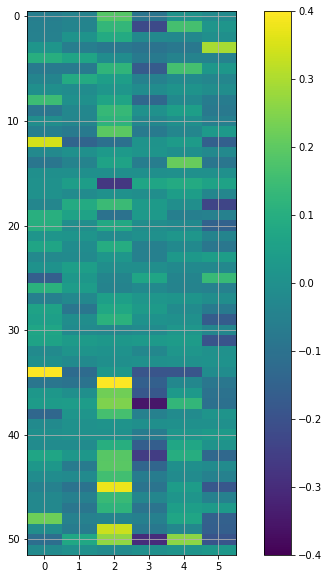

In [1382]:
Result4_All=pd.DataFrame(columns=['0','1','2','3','4','5'])
Result4_All['0']=Result4.loc[Result4['Cluster Labels'] == 0].mean()
Result4_All['1']=Result4.loc[Result4['Cluster Labels'] == 1].mean()
Result4_All['2']=Result4.loc[Result4['Cluster Labels'] == 2].mean()
Result4_All['3']=Result4.loc[Result4['Cluster Labels'] == 3].mean()
Result4_All['4']=Result4.loc[Result4['Cluster Labels'] == 4].mean()
Result4_All['5']=Result4.loc[Result4['Cluster Labels'] == 5].mean()
Result4_All_m=Result4_All.T.mean()
for i in Result4_All:
    
    Result4_All[i]=Result4_All[i]-Result4_All_m
    


from pylab import *
import pylab

figure(figsize=(10,10))
#figure(1)
imshow(Result4_All.iloc[5:80,:], interpolation='nearest', aspect='0.3',vmin=-0.4, vmax=0.4)
colorbar()

grid(True)
Result4_All.reset_index(inplace=True)

look at the most noticable differences from the mean for a selected cluster


In [1402]:

Result4_All2=Result4_All.iloc[5:80,:]
class_t='5'
Result4_All_a=Result4_All2[[class_t]]
Result4_All_b=pd.concat([Result4_All_a, Result4_All2[['index']]], axis=1, join='inner')
Result4_All_c=Result4_All_b[['index',class_t]].sort_values(by=[class_t],ascending=False)
print("Key characteristics of %s cluster" % (class_t),'are:')
print('Most outstanding attributes are :',Result4_All_c.iloc[0:10,:])
print('Most outstanding attributes are :',Result4_All_c.iloc[Result4_All_c.shape[0]-10:Result4_All_c.shape[0],:])
#Result4_All_c.shape[0]

Key characteristics of 5 cluster are:
Most outstanding attributes are :                      index         5
26                 car_avr  0.181794
50              museum_tot  0.124137
54  tourist_attraction_tot  0.102341
40         art_gallery_tot  0.077176
33                park_avr  0.065984
14              museum_usr  0.063152
30             library_avr  0.061472
41                café_tot  0.047382
45               store_tot  0.039557
46             medical_tot  0.038316
Most outstanding attributes are :                      index         5
49       movie_theater_tot -0.204264
51                park_tot -0.204877
9                store_usr -0.218171
48             library_tot -0.219799
43         bus_station_tot -0.268013
15                park_usr -0.269034
11                 spa_usr -0.281899
20                 zoo_usr -0.334852
56                 zoo_tot -0.341049
18  tourist_attraction_usr -0.400306


# First Cost Class only

Perform K means clustering for first costs class and plot the results on the map

In [1345]:
import branca
import branca.colormap as cm

typee=0
Result4=Result3.iloc[:,0:54].loc[Result3['Type'] == typee]
#Result4=Result2


kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Result4)

# check cluster labels generated for each row in the dataframe
Result4.insert(0, 'Cluster Labels', kmeans.labels_)
Result4.insert(0, 'lat', Result3['lat'].loc[Result3['Type'] == typee])
Result4.insert(0, 'lng', Result3['lng'].loc[Result3['Type'] == typee])
Result4.insert(0, 'Metro', Result3['Metro'].loc[Result3['Type'] == typee])


kmeans.labels_[0:10] 


colormap = cm.LinearColormap(colors=['Red','blue','yellow'], index=[0 ,kclusters/2, kclusters-1],vmin=0,vmax=kclusters-1)
Res=Result4['Cluster Labels']

latitude=Fianl_Metro_types['lat'][41]
longitude=Fianl_Metro_types['lng'][41]
num_types=4
map_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Result4['lat'], Result4['lng'], Result4['Metro'], Res):
    label = folium.Popup(str(poi) + ' Type ' + str(cluster), parse_html=True)
    #print(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colormap(cluster),
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colormap(cluster),
        fill_opacity=0.7).add_to(map_moscow)
    
map_moscow.add_child(colormap)
map_moscow

Create data characterization matrix

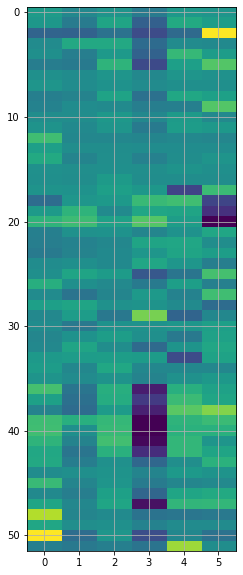

In [1353]:
Result4_All=pd.DataFrame(columns=['0','1','2','3','4','5'])
Result4_All['0']=Result4.loc[Result4['Cluster Labels'] == 0].mean()
Result4_All['1']=Result4.loc[Result4['Cluster Labels'] == 1].mean()
Result4_All['2']=Result4.loc[Result4['Cluster Labels'] == 2].mean()
Result4_All['3']=Result4.loc[Result4['Cluster Labels'] == 3].mean()
Result4_All['4']=Result4.loc[Result4['Cluster Labels'] == 4].mean()
Result4_All['5']=Result4.loc[Result4['Cluster Labels'] == 5].mean()
Result4_All_m=Result4_All.T.mean()
for i in Result4_All:
    
    Result4_All[i]=Result4_All[i]-Result4_All_m
    

from pylab import *
import pylab

figure(figsize=(10,10))
#figure(1)
imshow(Result4_All.iloc[5:80,:], interpolation='nearest', aspect='0.3',vmin=-0.4, vmax=0.4)
grid(True)
Result4_All.reset_index(inplace=True)

look at the most noticable differences from the mean for a selected cluster


In [1369]:

Result4_All2=Result4_All.iloc[5:80,:]
class_t='0'
Result4_All_a=Result4_All2[[class_t]]
Result4_All_b=pd.concat([Result4_All_a, Result4_All2[['index']]], axis=1, join='inner')
Result4_All_c=Result4_All_b[['index',class_t]].sort_values(by=[class_t],ascending=False)
print("Key characteristics of %s cluster" % (class_t),'are:')
print('Most outstanding attributes are :',Result4_All_c.iloc[0:10,:])
print('Most outstanding attributes are :',Result4_All_c.iloc[Result4_All_c.shape[0]-10:Result4_All_c.shape[0],:])
#Result4_All_c.shape[0]

Key characteristics of 0 cluster are:
Most outstanding attributes are :                 index         0
55     university_tot  0.429831
53        stadium_tot  0.308036
41           café_tot  0.164035
45          store_tot  0.155515
17        stadium_usr  0.153195
44            car_tot  0.150637
50         museum_tot  0.142639
46        medical_tot  0.119443
25    bus_station_avr  0.118846
31  movie_theater_avr  0.101138
Most outstanding attributes are :                 index         0
43    bus_station_tot -0.041605
14         museum_usr -0.046388
56            zoo_tot -0.053667
13  movie_theater_usr -0.055136
26            car_avr -0.056152
27          store_avr -0.057205
10        medical_usr -0.060222
28        medical_avr -0.070872
23           café_avr -0.117218
7     bus_station_usr -0.141787


# Second Cost Class Only

Perform K means clustering for Second costs class and plot the results on the map

In [1370]:
import branca
import branca.colormap as cm

typee=1
Result4=Result3.iloc[:,0:54].loc[Result3['Type'] == typee]
#Result4=Result2


kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Result4)

# check cluster labels generated for each row in the dataframe
Result4.insert(0, 'Cluster Labels', kmeans.labels_)
Result4.insert(0, 'lat', Result3['lat'].loc[Result3['Type'] == typee])
Result4.insert(0, 'lng', Result3['lng'].loc[Result3['Type'] == typee])
Result4.insert(0, 'Metro', Result3['Metro'].loc[Result3['Type'] == typee])


kmeans.labels_[0:10] 


colormap = cm.LinearColormap(colors=['Red','blue','yellow'], index=[0 ,kclusters/2, kclusters-1],vmin=0,vmax=kclusters-1)
Res=Result4['Cluster Labels']

latitude=Fianl_Metro_types['lat'][41]
longitude=Fianl_Metro_types['lng'][41]
num_types=4
map_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Result4['lat'], Result4['lng'], Result4['Metro'], Res):
    label = folium.Popup(str(poi) + ' Type ' + str(cluster), parse_html=True)
    #print(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colormap(cluster),
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colormap(cluster),
        fill_opacity=0.7).add_to(map_moscow)
    
map_moscow.add_child(colormap)
map_moscow

Create data characterization matrix

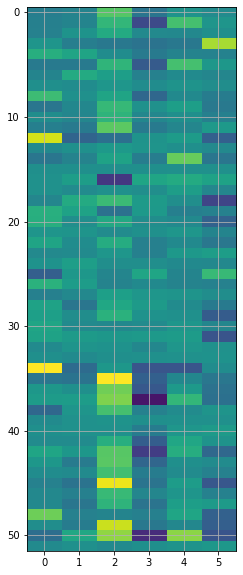

In [1371]:
Result4_All=pd.DataFrame(columns=['0','1','2','3','4','5'])
Result4_All['0']=Result4.loc[Result4['Cluster Labels'] == 0].mean()
Result4_All['1']=Result4.loc[Result4['Cluster Labels'] == 1].mean()
Result4_All['2']=Result4.loc[Result4['Cluster Labels'] == 2].mean()
Result4_All['3']=Result4.loc[Result4['Cluster Labels'] == 3].mean()
Result4_All['4']=Result4.loc[Result4['Cluster Labels'] == 4].mean()
Result4_All['5']=Result4.loc[Result4['Cluster Labels'] == 5].mean()
Result4_All_m=Result4_All.T.mean()
for i in Result4_All:
    
    Result4_All[i]=Result4_All[i]-Result4_All_m
    

from pylab import *
import pylab

figure(figsize=(10,10))
#figure(1)
imshow(Result4_All.iloc[5:80,:], interpolation='nearest', aspect='0.3',vmin=-0.4, vmax=0.4)
grid(True)
Result4_All.reset_index(inplace=True)

look at the most noticable differences from the mean for a selected cluster


In [1377]:

Result4_All2=Result4_All.iloc[5:80,:]
class_t='5'
Result4_All_a=Result4_All2[[class_t]]
Result4_All_b=pd.concat([Result4_All_a, Result4_All2[['index']]], axis=1, join='inner')
Result4_All_c=Result4_All_b[['index',class_t]].sort_values(by=[class_t],ascending=False)
print("Key characteristics of %s cluster" % (class_t),'are:')
print('Most outstanding attributes are :',Result4_All_c.iloc[0:10,:])
print('Most outstanding attributes are :',Result4_All_c.iloc[Result4_All_c.shape[0]-10:Result4_All_c.shape[0],:])
#Result4_All_c.shape[0]

Key characteristics of 5 cluster are:
Most outstanding attributes are :            index         5
8        car_usr  0.296657
30   library_avr  0.137947
21  aquarium_avr  0.060760
28   medical_avr  0.045947
52    school_tot  0.037480
45     store_tot  0.035222
16    school_usr  0.031954
56       zoo_tot  0.024552
10   medical_usr  0.023658
6       bank_usr  0.015763
Most outstanding attributes are :                      index         5
47                 spa_tot -0.129215
25         bus_station_avr -0.149373
53             stadium_tot -0.152272
17             stadium_usr -0.154138
54  tourist_attraction_tot -0.157278
34              school_avr -0.166455
50              museum_tot -0.184204
36  tourist_attraction_avr -0.191868
55          university_tot -0.192394
23                café_avr -0.231673


# Third cost class only

Perform K means clustering for Third costs class and plot the results on the map

In [1236]:
import branca
import branca.colormap as cm

typee=2
Result4=Result3.iloc[:,0:54].loc[Result3['Type'] == typee]
#Result4=Result2


kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Result4)

# check cluster labels generated for each row in the dataframe
Result4.insert(0, 'Cluster Labels', kmeans.labels_)
Result4.insert(0, 'lat', Result3['lat'].loc[Result3['Type'] == typee])
Result4.insert(0, 'lng', Result3['lng'].loc[Result3['Type'] == typee])
Result4.insert(0, 'Metro', Result3['Metro'].loc[Result3['Type'] == typee])


kmeans.labels_[0:10] 


colormap = cm.LinearColormap(colors=['Red','blue','yellow'], index=[0 ,kclusters/2, kclusters-1],vmin=0,vmax=kclusters-1)
Res=Result4['Cluster Labels']

latitude=Fianl_Metro_types['lat'][41]
longitude=Fianl_Metro_types['lng'][41]
num_types=4
map_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Result4['lat'], Result4['lng'], Result4['Metro'], Res):
    label = folium.Popup(str(poi) + ' Type ' + str(cluster), parse_html=True)
    #print(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colormap(cluster),
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colormap(cluster),
        fill_opacity=0.7).add_to(map_moscow)
    
map_moscow.add_child(colormap)
map_moscow

Create data characterization matrix

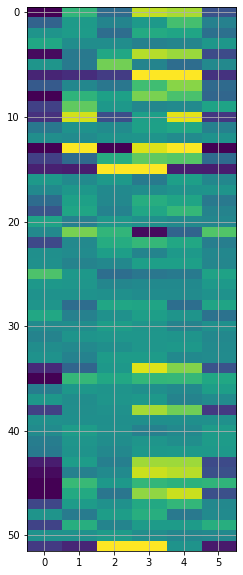

In [1243]:
Result4_All=pd.DataFrame(columns=['0','1','2','3','4','5'])
Result4_All['0']=Result4.loc[Result4['Cluster Labels'] == 0].mean()
Result4_All['1']=Result4.loc[Result4['Cluster Labels'] == 1].mean()
Result4_All['2']=Result4.loc[Result4['Cluster Labels'] == 2].mean()
Result4_All['3']=Result4.loc[Result4['Cluster Labels'] == 3].mean()
Result4_All['4']=Result4.loc[Result4['Cluster Labels'] == 4].mean()
Result4_All['5']=Result4.loc[Result4['Cluster Labels'] == 5].mean()
Result4_All_m=Result4_All.T.mean()
for i in Result4_All:
    
    Result4_All[i]=Result4_All[i]-Result4_All_m
    

from pylab import *
import pylab

figure(figsize=(10,10))
#figure(1)
imshow(Result4_All.iloc[5:80,:], interpolation='nearest', aspect='0.3',vmin=-0.4, vmax=0.4)
grid(True)
Result4_All.reset_index(inplace=True)

look at the most noticable differences from the mean for a selected cluster


In [1396]:

Result4_All2=Result4_All.iloc[5:80,:]
class_t='5'
Result4_All_a=Result4_All2[[class_t]]
Result4_All_b=pd.concat([Result4_All_a, Result4_All2[['index']]], axis=1, join='inner')
Result4_All_c=Result4_All_b[['index',class_t]].sort_values(by=[class_t],ascending=False)
print("Key characteristics of %s cluster" % (class_t),'are:')
print('Most outstanding attributes are :',Result4_All_c.iloc[0:10,:])
print('Most outstanding attributes are :',Result4_All_c.iloc[Result4_All_c.shape[0]-10:Result4_All_c.shape[0],:])
#Result4_All_c.shape[0]

Key characteristics of 5 cluster are:
Most outstanding attributes are :               index         5
30      library_avr  0.137947
21     aquarium_avr  0.060760
28      medical_avr  0.045947
52       school_tot  0.037480
45        store_tot  0.035222
16       school_usr  0.031954
56          zoo_tot  0.024552
10      medical_usr  0.023658
43  bus_station_tot  0.014118
46      medical_tot  0.011772
Most outstanding attributes are :                      index         5
47                 spa_tot -0.129215
25         bus_station_avr -0.149373
53             stadium_tot -0.152272
17             stadium_usr -0.154138
54  tourist_attraction_tot -0.157278
34              school_avr -0.166455
50              museum_tot -0.184204
36  tourist_attraction_avr -0.191868
55          university_tot -0.192394
23                café_avr -0.231673


# Forth Cost Class Only

Perform K means clustering for Forth costs class and plot the results on the map

In [1398]:
import branca
import branca.colormap as cm
typee=3
Result4=Result3.iloc[:,0:54].loc[Result3['Type'] == typee]
#Result4=Result2


kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Result4)

# check cluster labels generated for each row in the dataframe
Result4.insert(0, 'Cluster Labels', kmeans.labels_)
Result4.insert(0, 'lat', Result3['lat'].loc[Result3['Type'] == typee])
Result4.insert(0, 'lng', Result3['lng'].loc[Result3['Type'] == typee])
Result4.insert(0, 'Metro', Result3['Metro'].loc[Result3['Type'] == typee])


kmeans.labels_[0:10] 


colormap = cm.LinearColormap(colors=['Red','blue','yellow'], index=[0 ,kclusters/2, kclusters-1],vmin=0,vmax=kclusters-1)
Res=Result4['Cluster Labels']

latitude=Fianl_Metro_types['lat'][41]
longitude=Fianl_Metro_types['lng'][41]
num_types=4
map_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Result4['lat'], Result4['lng'], Result4['Metro'], Res):
    label = folium.Popup(str(poi) + ' Type ' + str(cluster), parse_html=True)
    #print(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colormap(cluster),
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colormap(cluster),
        fill_opacity=0.7).add_to(map_moscow)
    
map_moscow.add_child(colormap)
map_moscow

Create data characterization matrix

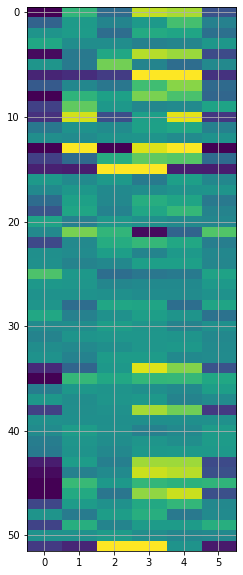

In [1399]:
Result4_All=pd.DataFrame(columns=['0','1','2','3','4','5'])
Result4_All['0']=Result4.loc[Result4['Cluster Labels'] == 0].mean()
Result4_All['1']=Result4.loc[Result4['Cluster Labels'] == 1].mean()
Result4_All['2']=Result4.loc[Result4['Cluster Labels'] == 2].mean()
Result4_All['3']=Result4.loc[Result4['Cluster Labels'] == 3].mean()
Result4_All['4']=Result4.loc[Result4['Cluster Labels'] == 4].mean()
Result4_All['5']=Result4.loc[Result4['Cluster Labels'] == 5].mean()
Result4_All_m=Result4_All.T.mean()
for i in Result4_All:
    
    Result4_All[i]=Result4_All[i]-Result4_All_m
    

from pylab import *
import pylab

figure(figsize=(10,10))
#figure(1)
imshow(Result4_All.iloc[5:80,:], interpolation='nearest', aspect='0.3',vmin=-0.4, vmax=0.4)
grid(True)
Result4_All.reset_index(inplace=True)

look at the most noticable differences from the mean for a selected cluster


In [1400]:

Result4_All2=Result4_All.iloc[5:80,:]
class_t='5'
Result4_All_a=Result4_All2[[class_t]]
Result4_All_b=pd.concat([Result4_All_a, Result4_All2[['index']]], axis=1, join='inner')
Result4_All_c=Result4_All_b[['index',class_t]].sort_values(by=[class_t],ascending=False)
print("Key characteristics of %s cluster" % (class_t),'are:')
print('Most outstanding attributes are :',Result4_All_c.iloc[0:10,:])
print('Most outstanding attributes are :',Result4_All_c.iloc[Result4_All_c.shape[0]-10:Result4_All_c.shape[0],:])
#Result4_All_c.shape[0]

Key characteristics of 5 cluster are:
Most outstanding attributes are :                      index         5
26                 car_avr  0.181794
50              museum_tot  0.124137
54  tourist_attraction_tot  0.102341
40         art_gallery_tot  0.077176
33                park_avr  0.065984
14              museum_usr  0.063152
30             library_avr  0.061472
41                café_tot  0.047382
45               store_tot  0.039557
46             medical_tot  0.038316
Most outstanding attributes are :                      index         5
49       movie_theater_tot -0.204264
51                park_tot -0.204877
9                store_usr -0.218171
48             library_tot -0.219799
43         bus_station_tot -0.268013
15                park_usr -0.269034
11                 spa_usr -0.281899
20                 zoo_usr -0.334852
56                 zoo_tot -0.341049
18  tourist_attraction_usr -0.400306
